In [1]:
!pip install nibabel

<h3> Importing Libraries</h3>

In [2]:
import pandas as pd
import nibabel as nib
import os
from PIL import Image, ImageSequence
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
def load_nii(img_path):
    nimg = nib.load(img_path)
    return nimg.get_data(), nimg.affine, nimg.header, nimg.get_fdata(), nimg.shape

<h3> Loading a sample MRI image</h3>

In [4]:
path = r'C:\capstone\New folder\New folder\disc1\OAS1_0001_MR1\FSL_SEG\OAS1_0001_MR1_mpr_n4_anon_111_t88_masked_gfc_fseg_tra_90.gif'
im = Image.open(path)

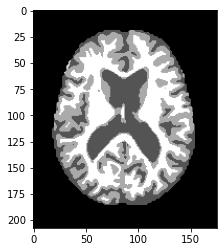

In [5]:
plt.imshow(im,cmap="gray")

<h3>Loading the Dataset</h3>

In [6]:
df = pd.read_excel(r'C:\capstone\New folder\oasis_longitudinal_demographics.xlsx')

In [7]:
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1692.880000,0.693926,1.036690
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688.009649,0.675457,1.039686
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319.020000,0.801006,1.330540
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1326.650000,0.795981,1.322890


In [8]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623


<h3>Finding the nuumber of features and columns in the dataset</h3>

In [87]:
print("The number of features and columns in the dataset are:",df.shape)

The number of features and columns in the dataset are: (373, 15)


<h3>Changing the column names to be more appropriate</h3>

In [88]:
df.rename(columns = {'CDR':'Target'}, inplace = True)

In [29]:
df['Target'] = df['Target'].apply(lambda x: True if x>0 else False)

<h3>Datatypes of all the columns</h3>

In [30]:
df.dtypes

Subject ID     object
MRI ID         object
Group          object
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
Target           bool
eTIV          float64
nWBV          float64
ASF           float64
dtype: object

<h3>Unique values in each object columns</h3>

In [31]:
df['Subject ID'].value_counts()

OAS2_0070    5
OAS2_0048    5
OAS2_0127    5
OAS2_0073    5
OAS2_0034    4
            ..
OAS2_0071    2
OAS2_0069    2
OAS2_0068    2
OAS2_0066    2
OAS2_0092    2
Name: Subject ID, Length: 150, dtype: int64

In [32]:
df['MRI ID'].value_counts()#Since every Id is unique the values are expected to be 1.

OAS2_0001_MR1    1
OAS2_0118_MR2    1
OAS2_0122_MR2    1
OAS2_0122_MR1    1
OAS2_0121_MR2    1
                ..
OAS2_0057_MR3    1
OAS2_0057_MR2    1
OAS2_0057_MR1    1
OAS2_0056_MR2    1
OAS2_0186_MR3    1
Name: MRI ID, Length: 373, dtype: int64

In [33]:
df['Group'].value_counts()

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

In [34]:
df['M/F'].value_counts()

F    213
M    160
Name: M/F, dtype: int64

In [35]:
df['Hand'].value_counts()#The dataset only contains informations regarding righthanded people

R    373
Name: Hand, dtype: int64

<h3>Number of null values in each column</h3>

In [42]:
df.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
Target         0
eTIV           0
nWBV           0
ASF            0
dtype: int64

<h3>Finding the correlation between the columns</h3>

In [43]:
data =  df.drop(['Target'], axis=1)

C:\Users\abhin\AppData\Local\Temp\ipykernel_22952\826711064.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(data.corr(), mask = np.triu(np.ones_like(corr, dtype=np.bool)),linewidth=0.1, ax=ax)


<AxesSubplot:>

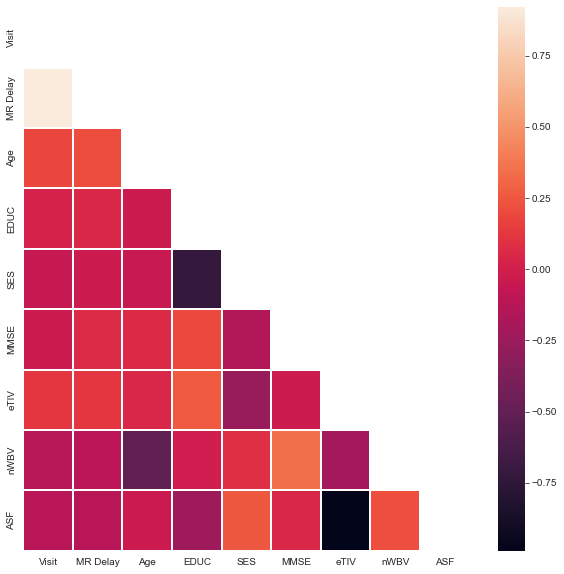

In [85]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), mask = np.triu(np.ones_like(corr, dtype=np.bool)),linewidth=0.1, ax=ax)

<h3>Distribution of target column</h3>

In [90]:
df['Target'].value_counts()

False    206
True     167
Name: Target, dtype: int64